本书配套视频课程：[解剖深度学习原理，从0实现深度学习库](https://ke.qq.com/course/2900371?tuin=ac5537fd) 

更多代码或学习资料将向购买视频课程或书的学生提供。


+ 博客网站：[https://hwdong-net.github.io](https://hwdong-net.github.io)
+ youtube频道: [hwdong](http://www.youtube.com/c/hwdong)
+ bilibili网站：[hw-dong](https://space.bilibili.com/281453312)

## 1.4  概率

下面的代码用函数one_coin_test(n)模拟一次试验（抛n次硬币），返回其中出现正面的频率。可以看到随着n增大，频率是逼近概率0.5的。

In [1]:
from random import randint
def one_coin_test(n):
    head_tails=[]
    for i in range(n):
        head_tails.append(randint(0,1))
    heads = head_tails.count(1)
    return heads/n

for n in range(10,50000,2000):
    print(one_coin_test(n),end=', ')

0.7, 0.49203980099502487, 0.5099750623441397, 0.4960066555740433, 0.49737827715355803, 0.5028971028971029, 0.5047460449625312, 0.4952890792291221, 0.4956277326670831, 0.5003331482509716, 0.5020489755122439, 0.5012267151294866, 0.49683465222823825, 0.5051518646674356, 0.5009639414494823, 0.5015994668443852, 0.498406747891284, 0.5017053807703616, 0.5000555401277423, 0.4980531439094975, 0.5009997500624844, 0.5013806236610331, 0.5011133833219723, 0.5008041730058683, 0.4982503645073943, 

下列代码绘制了X取值0，1，2，3的这个概率分布率。可以看到出上述4个整数外，X取得其他值的概率为0。

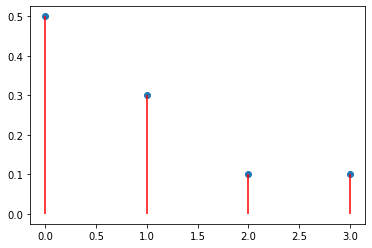

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

x = [0,1,2,3]
p = [0.5,0.3,0.1,0.1]
plt.vlines(0, 0, 0.5,color="red")
plt.vlines(1, 0, 0.3,color="red")
plt.vlines(2, 0, 0.1,color="red")
plt.vlines(3, 0, 0.1,color="red")
plt.scatter(x,p)
plt.show()

下列代码绘制了不同的$\mu,\sigma$值的高斯概率密度：

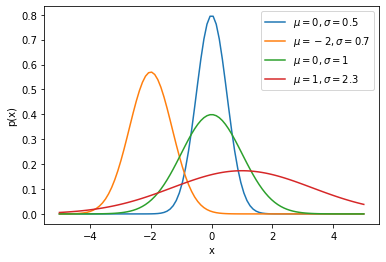

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-np.power(x - mu, 2) / (2 * np.power(sigma, 2.)))

x = np.linspace(-5, 5, 100)
plt.plot(x, gaussian(x,0,0.5))
plt.plot(x, gaussian(x,-2,0.7))
plt.plot(x, gaussian(x,0,1))
plt.plot(x, gaussian(x,1,2.3))
plt.legend(['$\mu=0,\sigma=0.5$','$\mu=-2,\sigma=0.7$','$\mu=0,\sigma=1$','$\mu=1,\sigma=2.3$'])
#plt.axis('equal')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

阶梯形的分布函数$F(x)$：

$$F(x)=\begin{cases}0, &x<3 \cr 0.3, & 3\leq x< 4\cr 1, & x \ge 4 \end{cases}$$

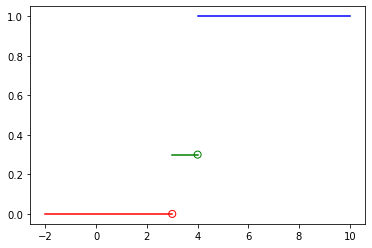

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
lines = [(-2, 3), (0, 0),'r',(3, 4), (0.3, 0.3),'g',(4, 10), (1, 1),'b']
plt.plot(*lines)
plt.scatter(3,0, s=50, facecolors='none', edgecolors='r')
plt.scatter(4,0.3, s=50, facecolors='none', edgecolors='g')

下面代码绘制了上图的高斯概率密度对应的分布函数：

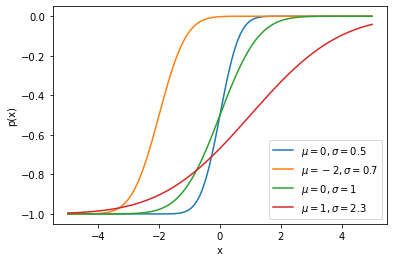

In [5]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-np.power(x - mu, 2) / (2 * np.power(sigma, 2.)))
def gaussion_dist(x,mu, sigma):
    return quad(gaussian, np.inf,x, args=(mu, sigma))
vec_gaussion_dist = np.vectorize(gaussion_dist) 

x = np.linspace(-5, 5, 100)
plt.plot(x, vec_gaussion_dist(x,0,0.5)[0])
plt.plot(x, vec_gaussion_dist(x,-2,0.7)[0])
plt.plot(x, vec_gaussion_dist(x,0,1)[0])
plt.plot(x, vec_gaussion_dist(x,1,2.3)[0])
plt.legend(['$\mu=0,\sigma=0.5$','$\mu=-2,\sigma=0.7$','$\mu=0,\sigma=1$','$\mu=1,\sigma=2.3$'])

plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()